### Sales Prediction¶
( Simple Linear Regression)

* Data¶
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
df = pd.read_csv(r"D:\datasets\advertising.csv")

In [22]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [23]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Exploratory Data Analysis (EDA)

In [25]:
# check correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### Data cleaning

In [26]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

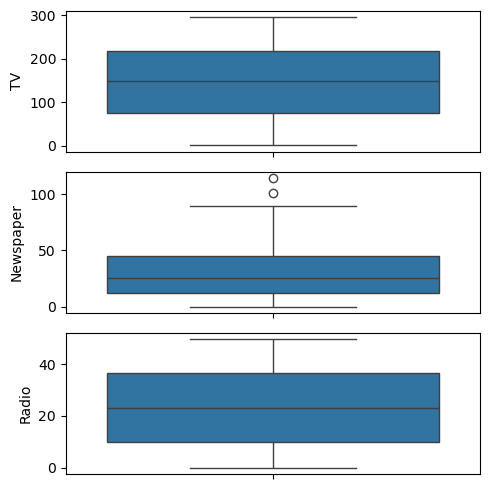

In [27]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
# There are no considerable outliers present in the data.

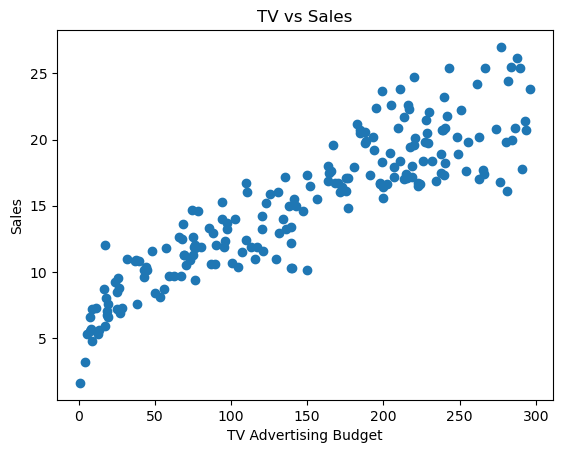

In [28]:
#Visualize relationship (TV vs Sales):
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()

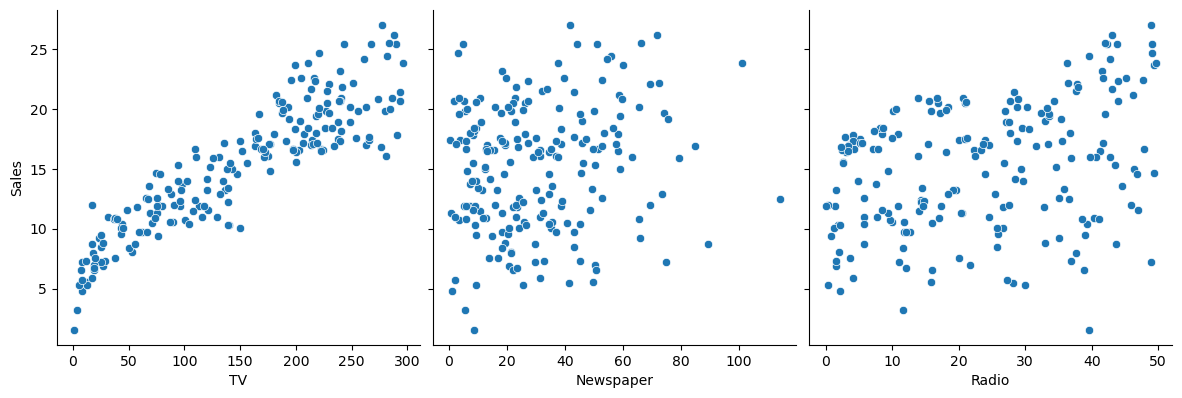

In [30]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


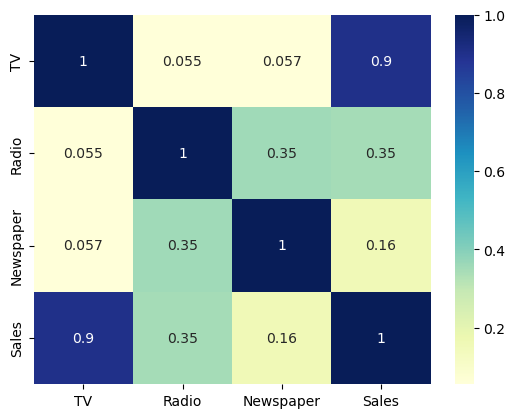

In [32]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()


### 
As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

### Model Building¶

### Performing Simple Linear Regression¶
Equation of linear regression
y=c+m1x1+m2x2+...+mnxn


* y is the response

* c is the intercept

* m1 is the coefficient for the first feature

* mn is the coefficient for the nth feature
In our case:

y=c+m1×TV


The m values are called the model coefficients or model parameters.

In [33]:
X = df[['TV']]
y = df['Sales']

In [35]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train Model

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Equation

In [37]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 7.007108428241851
Coefficient: 0.05548294393146318


### quation form:


                  Sales = b0 + b1(TV)

Example interpretation:

If coefficient = 0.047
→ For every ₹1 increase in TV ads, sales increase by 0.047 units.

In [40]:
y_pred = model.predict(X_test)
print(y_pred)

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


In [41]:
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
})

print(comparison.head())

     Actual Sales  Predicted Sales
95           16.9        16.067473
15           22.4        17.848476
30           21.4        23.258063
158           7.3         7.656259
128          24.7        19.230001


### What model.predict() Actually Does

* It applies the regression equation:
                                    Sales=c+m×TV
  For each value in X_test.
  Example:
If:

Intercept = 7

Coefficient = 0.047

TV = 200

Then:

𝑆
𝑎
𝑙
𝑒
𝑠
=
7
+
(
0.047
×
200
)
=
16.4
Sales=7+(0.047×200)=16.4

That becomes one predicted value inside y_pred.

In [42]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 6.101072906773964
R2 Score: 0.802561303423698


### 1. Mean Squared Error (MSE)
𝑀
𝑆
𝐸
=
1
𝑛
∑
(
𝑦
𝑎
𝑐
𝑡
𝑢
𝑎
𝑙
−
𝑦
𝑝
𝑟
𝑒
𝑑
𝑖
𝑐
𝑡
𝑒
𝑑
)
2
MSE=
n
1
	​

∑(y
actual
	​

−y
predicted
	​

)
2

Measures average squared prediction error

Lower value = better model

Always positive

Unit is squared (Sales²)

If MSE is small → predictions are close to actual values.

 2. R² Score (Coefficient of Determination)
𝑅
2
=
1
−
𝑆
𝑆
𝑟
𝑒
𝑠
𝑆
𝑆
𝑡
𝑜
𝑡
R
2
=1−
SS
tot
	​

SS
res
	​

	​


Measures how much variance in Sales is explained by TV

Range: 0 to 1

Interpretation:

R² Value	Meaning
0.90+	Excellent
0.80–0.90	Very Good
0.60–0.80	Moderate
<0.50	Weak

For this Advertising dataset using only TV, you should get roughly:

 R² ≈ 0.80–0.85

Meaning:

Around 80–85% of Sales variation is explained by TV advertising alone.

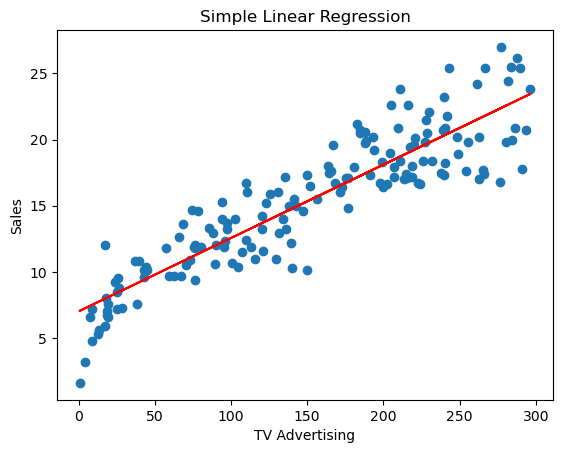

In [44]:
# Regression Line
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("Simple Linear Regression")
plt.show()

### \
Blue dots → Actual sales

Red line → Predicted sales